## Algorithms and Data Structures in Python — Assignment 4 ##

The following assignment will test your understanding of topics covered in the first five weeks of the course. This assignment **will count towards your grade** and should be submitted through Canvas by **18.10.2022 at 08:59 (CEST)**. You are required to work and prepare your submissions in groups with 3 students per group. You can get at most 10 points for Assignment 4, which is 10\% of your final grade. 

1. For submission, please rename your notebook as ```{first_student_id}_{second_student_id}_{third_student_id}.ipynb```. For example, submission by students with student ID numbers *11760001*, *11760002* and *11760003* should have the filename ```11760001_11760002_11760003.ipynb```.

2. Please follow the function prototype specified in the question for writing your code. The usage of additional functions is acceptable unless the problem expressly prohibits it. If this structure is modified, it will fail automated testing steps.

3. All submissions will be checked for code similarity. Submissions with high similarity will be summarily rejected and no points will be awarded.

4. Please do NOT use the ```input()``` function in your code. 

5. For each exercise the correct solution counts for the 80% of the exercise's points, while code style counts for the remaining 20%. Please, make sure that you explain what your implementation does using comments.

6. Usage of ```dataclasses``` is not allowed.

### Working with Classes ###

Travel agents work with various planning applications to get real-time travel information to serve their clients. In this assignment, you will build a complete product that will offer travel agents the ability to add, delete and update railway travel information for several railway stations in the country (Netherlands), while still being able to view complex connections with a single command. You will be storing this information in a graph. A graph is composed of nodes (vertices) connected with edges. The nodes in our problem are railway stations, while the edges are railway connections between them.

For this exercise, you will write two classes:

1. The ```RailwayStation``` class stores attributes commonly associated with railway stations (e.g. railway station name, railway station code, inbound and outbound connections) in a single place.

2. The ```RailwayNetwork``` class  stores connections between these stations and provides an interface for travel agents to work with ```RailwayStation``` objects and build their own travel networks.

Let's look at these classes individually.

#### Problem 1: The ```RailwayStation``` class (4 points) ####

The ```RailwayStation``` class stores information associated with a railway station. This class must define the following attributes:


1. ```railway_station_name``` should accept the railway station name and save it within an instance variable.


2. ```railway_station_code``` should accept the railway station code and save it within an instance variable. Two distinct railway stations cannot have the same railway_station_code. Information about railway stations names and their respective codes (for railway stations in the Netherlands) can be found [here](https://en.wikipedia.org/wiki/Railway_stations_in_the_Netherlands) (in the **List of stations, with their official abbreviations** section). Write an appropriate setter method to ensure that the supplied railway station code complies with the general structure of a station code (string without numerical information, 3-4 characters long).


3. ```inbound_connections``` stores all destinations with an incoming train into this station.


4. ```outbound_connections``` stores a dictionary of destinations that can be reached from this railway station. The key for the dictionary is the ```railway_station_code``` of the destination and the value is ticket price.


In addition to these functions, you must also keep the following design constraints in mind:

1. The ```RailwayStation``` class is only intended to be accessed from the ```Network``` class that will be introduced shortly.


2. The class should define its ```__init__``` and ```__str__``` methods appropriately.


3. The ```RailwayStation``` class must additionally implement setter and deleter methods for adding and removing railways stations from ```inbound_connections``` and ```outbound_connections```.

The structure for ```RailwayStation``` class is provided below:

```python
class RailwayStation:
  def __init__(self, railway_station_name, railway_station_code):
    pass

  def __str__(self):
    pass

  def __repr__(self):
    pass

  def set_inbound_connection(self, railway_station_code):
    # Add an inbound connection to this railway station.
    pass

  def delete_inbound_connection(self, railway_station_code):
    # Delete an inbound connection to this railway station.
    pass

  def set_outbound_connection(self, railway_station_code, ticket_price):
    # Add an outbound connection from this railway station to a destination and the ticket price.
    pass

  def delete_outbound_connection(self, railway_station_code):
    # Delete an outbound connection from this railway station to a destination.
    pass
```

Please ensure that your indentation is correct.

In [1]:
# dependencies
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
class RailwayStation:
    
    used_station_codes = []
    
    def __init__(self, railway_station_name, railway_station_code):
        self.set_station_name(railway_station_name)
        self.set_station_code(railway_station_code)
        self.inbound_connections = []
        self.outbound_connections = {}

    def set_station_name(self, name):
        self.railway_station_name = name

    def set_station_code(self, code):
        if any(char.isdigit() for char in code):
            raise Exception("station code can only contain non-numeric characters")
        elif len(code) not in range(2, 5):
            raise Exception("station code must be 3 or 4 characters long")
        elif code in self.used_station_codes:
            raise Exception("station code is already in use")
        
        self.used_station_codes.append(code)
        self.railway_station_code = code
            
    def __str__(self):
        info = ""
        info += f"Station name: {self.railway_station_name} \n"
        info += f"Station code: {self.railway_station_code}\n"
        info += f"Inbound connections: {self.inbound_connections}\n"
        info += f"Outbound connections: {self.outbound_connections}\n"
        return info

    def __repr__(self):
        return f'RailwayStation(railway_station_name="{self.railway_station_name}", railway_station_code="{self.railway_station_code}")'

    def set_inbound_connection(self, railway_station_code):
        if railway_station_code in self.inbound_connections:
            raise Exception("inbound connection is already set")
        self.inbound_connections.append(railway_station_code)

    def delete_inbound_connection(self, railway_station_code):
        if railway_station_code not in self.inbound_connections:
            raise Exception("inbound connection is not in the list")
        self.inbound_connections.remove(railway_station_code)

    def set_outbound_connection(self, railway_station_code, ticket_price):
        if railway_station_code in self.outbound_connections:
            raise Exception("outbound connection is already set")
        self.outbound_connections[railway_station_code] = ticket_price
        
    def delete_outbound_connection(self, railway_station_code):
        if railway_station_code not in self.outbound_connections:
            raise Exception("inbound connection is not in the list")
        del(self.outbound_connections[railway_station_code])


#### Problem 2: The ```RailwayNetwork``` class (6 points) ####

The ```RailwayStation``` class takes care of individual railway stations. A railway network can contain hundreds of such railway stations. You will now build a ```RailwayNetwork``` class with the following functions:

1. ```def add_railway_station(self, railway_station_name, railway_station_code)``` adds a railway station with its respective name (e.g. **Amsterdam Central**) and code (e.g. **Asd**) to the graph. Remember that railway station codes are always unique and an agent should not be allowed to add two RailwayStation objects with the same railway station code into a network. You are also asked to set the built-in class methods ```__init__``` and ```__str__``` properly so that the objects are properly initialized and their str() representations provide readable, well-formatted string representations.


2. ```def set_route(self, src_railway_station_code, dst_railway_station_code, ticket_price)``` should add a connection from the source railway station to the destination railway station with the specified ticket price. You will accept railway station codes for source and destination and raise appropriate errors if the user tries to overwrite existing routes. This function will also update the inbound and outbound connection attributes for the source and destination RailwayStation objects.

3. ```def modify_route_price(self, src_railway_station_code, dst_railway_station_code, new_ticket_price)``` which should modify the price of an existing route from the source railway station to the destination railway station. You will accept railway station codes for source and destination and raise appropriate errors if the user tries to modify non-existent routes or supply invalid data.


4. ```def del_route(self, src_railway_station_code, dst_railway_station_code)``` which should delete the route and update the appropriate attributes of the source and destination RailwayStation objects.

6. ```def get_network_graph(self)``` uses information about nodes and their outbound connections for all RailwayStation objects in the Network instance to build a graphical representation of connectivity. You can look up https://python-graph-gallery.com/ on how to build these graphs. Figure 1 shows a simple example of what can be achieved with minimal effort.

<p align = "center"><img src = "https://surfdrive.surf.nl/files/index.php/s/K2YJMEiJrsNIdPp/download"></p><p align = "center">
<center><b><em>Figure 1: An example of a Railway Network (for illustration purposes only)</em>.</b></center></p>

The ```RailwayNetwork``` class should follow the function prototype as given below:


```python
class RailwayNetwork:
  def __init__(self):
      pass
  
  def add_railway_station(self, railway_station_name, railway_station_code):
      pass
    
  def set_route(self, src_railway_station_code, dst_railway_station_code, price):
      pass

  def modify_route_price(self, src_railway_station_code, dst_railway_station_code, new_price):
      pass

  def del_route(self, src_railway_station_code, dst_railway_station_code):
      pass
  
  def get_network_graph(self):
      pass
```

__NOTE__ : Raise appropriate errors if somebody tries to modify non-existent relations or supply invalid data.

In [3]:
class RailwayNetwork(RailwayStation):

    def __init__(self):
        self.stations = {}
        self.connections = []
        
    def add_railway_station(self, railway_station_name, railway_station_code):
        self.stations[railway_station_code] = RailwayStation(railway_station_name, railway_station_code)
            
    def set_route(self, src_railway_station_code, dst_railway_station_code, price):
        self.stations[src_railway_station_code].set_outbound_connection(dst_railway_station_code, price)
        self.stations[dst_railway_station_code].set_inbound_connection(src_railway_station_code)
        self.connections.append((src_railway_station_code, dst_railway_station_code))
        
    def modify_route_price(self, src_railway_station_code, dst_railway_station_code, new_price):
#         if (src_railway_station_code, dst_railway_station_code) not in self.connections:
#             raise Exception("No connection found with this source and destination")
        self.del_route(src_railway_station_code, dst_railway_station_code)
        self.set_route(src_railway_station_code, dst_railway_station_code, new_price)
#         self.stations[src_railway_station_code].outbound_connections[dst_railway_station_code] = new_price

    def del_route(self, src_railway_station_code, dst_railway_station_code):
        self.stations[src_railway_station_code].delete_outbound_connection(dst_railway_station_code)
        self.stations[dst_railway_station_code].delete_inbound_connection(src_railway_station_code)
        self.connections.remove((src_railway_station_code, dst_railway_station_code))

    def get_network_graph(self):
        G = nx.DiGraph()
        G.add_edges_from(self.connections)
        nx.draw(G, node_size=1200, with_labels=True, arrows=True, font_color="whitesmoke")
        plt.show()
    
    # add __str__


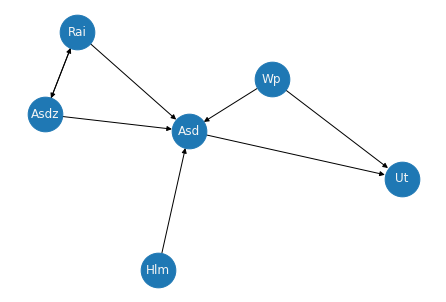

In [4]:
n = RailwayNetwork()

# Add railway stations.
n.add_railway_station('Amsterdam Central', 'Asd')
n.add_railway_station('Amsterdam Zuid', 'Asdz')
n.add_railway_station('Amsterdam Rai', 'Rai')
n.add_railway_station('Haarlem', 'Hlm')
n.add_railway_station('Weesp', 'Wp')
n.add_railway_station('Utrecht Centraal', 'Ut')

# Add routes between railway stations and set the ticket price.
n.set_route('Asdz', 'Rai', 1)
n.set_route('Rai', 'Asdz', 1)
n.set_route('Asdz', 'Asd', 3)
n.set_route('Rai', 'Asd', 1)
n.set_route('Hlm', 'Asd', 2)
n.set_route('Wp', 'Asd', 2)
n.set_route('Wp', 'Ut', 3)
n.set_route('Asd', 'Ut', 5)

# Visualize the Railway Network.
n.get_network_graph()

### Some Example Inputs 

Below are some example inputs. Please note that these commands represent only a small set of possible commands that your program may be tested against.

```python
n = RailwayNetwork()

# Add railway stations.
n.add_railway_station('Amsterdam Central', 'Asd')
n.add_railway_station('Amsterdam Zuid', 'Asdz')
n.add_railway_station('Amsterdam Rai', 'Rai')
n.add_railway_station('Haarlem', 'Hlm')
n.add_railway_station('Weesp', 'Wp')
n.add_railway_station('Utrecht Centraal', 'Ut')

# Add routes between railway stations and set the ticket price.
n.set_route('Asdz', 'Rai', 1)
n.set_route('Asdz', 'Asd', 3)
n.set_route('Rai', 'Asd', 1)
n.set_route('Hlm', 'Asd', 2)
n.set_route('Wp', 'Asd', 2)
n.set_route('Wp', 'Ut', 3)
n.set_route('Asd', 'Ut', 5)

# Visualize the Railway Network.
n.get_network_graph()

```

Now a few things to keep in mind:

1. This homework will be manually evaluated and points are earmarked for code cleanliness and comments. Pay special emphasis on testing your code with sufficient examples.

2. Set the built-in class methods ```__init__``` and ```__str__``` properly so that the objects are properly initialized and their ```str()``` representations provide readable, well-formatted information.